# Introduction to Quantum Computing with Qiskit

The foundation of Python for Quantum Computing is the *Qiskit* library, which provides a comprehensive set of tools for quantum computing. To get started, you need to first check if your Python installation in the current environment exceeds 3.10.x, and install Qiskit in your base or venv. You can do this using pip:

In [2]:
from platform import python_version
print(f"Python version: {python_version()}")

Python version: 3.12.6


In [ ]:
%pip install qiskit

If you're using Anaconda, make sure to install pip first for all other packages:

In [ ]:
%conda install pip
%pip install qiskit

Qiskit version should be 2.0.0 or later:

In [1]:
import qiskit
qiskit.__version__

'2.1.0'

If not, you can update using pip:

In [ ]:
%pip install --upgrade qiskit

Matplotlib is also required for visualizations, and some other packages may be needed for specific functionalities. You can install them using pip as well:

In [ ]:
%pip install matplotlib qiskit-ibm-runtime qiskit-aer

# Imports and Setup

You're all set! Now let's import the necessary libraries:

In [2]:
import numpy as np, matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# OTHER QISKIT IMPORTS

from qiskit import *
from qiskit.visualization import *
from qiskit_ibm_runtime import *
from qiskit_aer import *

# DRAW STYLE (default mpl dark), check https://quantum.cloud.ibm.com/docs/en/guides/visualize-circuits and 
# https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.visualization.circuit_drawer for more styles

def draw_circuit(qc):
    return qc.draw(output = 'mpl', style = 'iqp-dark')

# Quantum Computing Preliminary

The building block of quantum computing is the quantum bit, or *Qubit.* Unlike classical bits, which can be either 0 or 1, qubits can exist in a *superposition* of two states. This means that a qubit can represent multiple values simultaneously, allowing quantum computers to perform complex calculations much faster than classical computers through utilizing quantum phenomena.

Two quantum objects (particles, quasiparticles, atoms or just any arbitrary objects that can be modeled as qubits) can be *entangled* if the state of one object is dependent on the state of another, no matter how far apart they are. The origin of entanglement is of little importance for this course, but it is nonetheless a crucial concept in quantum computing.

A preliminary understanding of *Quantum Mechanics Ⅰ* is helpful, although not necessary for basic understanding. Quantum phenomena, namely superposition and entanglement are the fundamental concepts that enable quantum computing to outperform classical computing in certain tasks, and so these are primarily all that you need to understand.

We will focus on quantum computing in a programatic approach, though we will also touch on the theoretical understanding and implications. Digging deep is recommended, so I do recommend reading up at least just a little even if your background in Physics is not strong:

- [Wikipedia](https://en.wikipedia.org/wiki/Quantum_mechanics)
- [Sakurai](https://icourse.club/uploads/files/65fb4c16648d2b93f82fe3271c3381c211f2f532.pdf)
- [Feynman Lectures - Part III](https://www.feynmanlectures.caltech.edu/III_toc.html)
- [Notes by J. Greensite](https://stanford.edu/~oas/SI/QM/papers/QMGreensite.pdf)
- [Lecture by FreeCodeCamp](https://www.youtube.com/watch?v=tsbCSkvHhMo)

# The Circuit Model

The circuit model is a framework for quantum computing that uses *quantum gates* to manipulate qubits. They're basically the quantum analogs of classical logic gates, which perform operations on qubits, allowing for the creation of complex quantum algorithms we'll delve into later.

The concerned circuit diagrams are handled internally, specifically by the draw() method in Qiskit. We have our work cut out for us, and all we need to do is construct, interpret and execute! We'll now systematically walk you through the commonly used quantum gates that handle a single qubit: 

As you probably know, the state of a single qubit can be represented as a quantum superposition across the two basis states $\ket{0}$ and $\ket{1}$, mathematically represented as:

$$\ket{\Psi} = \alpha\ket{0} + \beta\ket{1}$$

where coefficients $\alpha,\beta\in\mathbb C$ abide by the conservation of probability $\lvert\alpha\rvert^2 + \lvert\beta\rvert^2 = 1$. These basis states are treated as part of the computational basis that makeup the system's Hilbert space, and the coefficients $\alpha$ and $\beta$ are complex numbers that represent the probability amplitudes of measuring the qubit in either state.

An effective, well-known way to visualize the state of a qubit is through the *Bloch sphere*, which is a geometrical representation of the pure state space of a two-level quantum mechanical system. The Bloch sphere provides a convenient way to visualize the state of a qubit and the effects of quantum gates on it:

![Bloch Sphere](https://prefetch.eu/know/concept/bloch-sphere/sketch-full.png?v=1)

The computational basis is represented by the poles, with $\ket{0}$ at the north pole and $\ket{1}$ at the south pole. Any point on the surface of the sphere represents a valid state of the qubit, and quantum gates can be visualized as rotations around the axes of the Bloch sphere.

The $\ket{\pm}$ and $\ket{\pm i}$ states are represented by the points on the equator of the Bloch sphere, which are **orthogonal** to the computational basis states. These states are often used in quantum algorithms and can be obtained by applying specific quantum gates to the computational basis states we'll get into shortly.

# Single Qubit Gates

Let's start simple, a single-qubit gate called the *X-gate*, which encapsulates the Pauli-X operation. This gate is analogous to the classical NOT gate, flipping the state of a qubit from $\ket{0}$ to $\ket{1}$ and vice versa. In terms of the Bloch sphere, it corresponds to a rotation of 180 degrees around the X-axis: 

$$\hat X\ket{\Psi}=\alpha\ket{1} + \beta\ket{0}$$

There are other such gates, which correspond to rotations around the Y and Z axes of the Bloch sphere, called to no one's surprise, the Y and Z gates. They're a little more complex, so we won't be tackling them just yet. However, at the heart of quantum superposition is the *Hadamard gate*, which is a single-qubit gate that creates superposition by transforming the computational basis states into the $\ket{\pm}$ states:

$$\begin{gather*}\hat H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})=\ket{+}&&&&&\hat H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})=\ket{-}\end{gather*}$$

This is all we'll cover for now, and we'll have a comprehensive notebook on just SQGs in the near future. Let's actually start computing. Circuits in Qiskit are built by you, and require a little intialization, so we create a `QuantumCircuit` object with one qubit `q` and one classical bit `c` to which `q` can *collapse* to after measurement. Note that conventionally, qubits in Qiskit are set to $\ket{0}$.

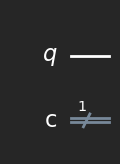

In [3]:
qc = QuantumCircuit(1, 1)
draw_circuit(qc)

Circuits are saved in their current state as several environment variables in your kernel, and you can add gates to the circuit using methods like `qc.h(0)` for the Hadamard gate, `qc.x(0)` for the X gate, and so on. The previously executed `draw()` method now renders an updated diagram of the circuit in your notebook.

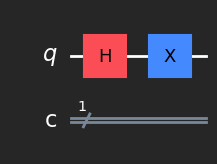

In [4]:
qc.h(0)
qc.x(0)

draw_circuit(qc)

Can you guess what state the qubit is in now? If you guessed $\ket{+}$, you're right! The Hadamard gate creates a superposition state, and the X gate is a similarity transform that preserves the signs of the coefficients, so the state remains $\ket{+}$: 

$$\hat{X}(\hat{H}\ket{0}) = \hat{X}(\ket{+}) = \ket{+}$$

We can also check if this result is true, by utilizing the `plot_bloch_multivector()` method to visualize the state on the Bloch sphere:

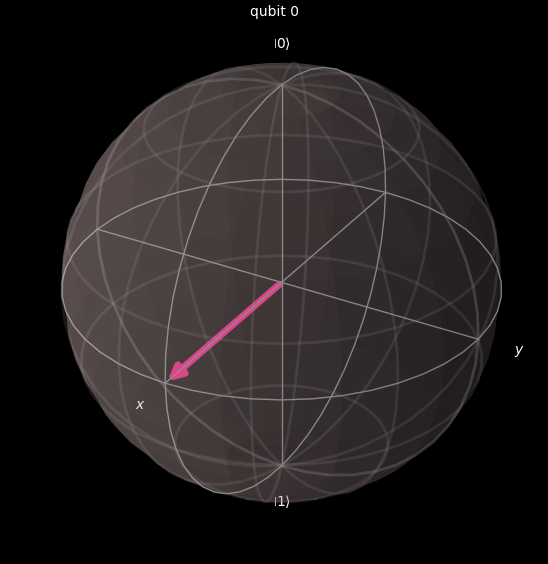

In [5]:
plot_bloch_multivector(qc)

We also run into an important dilemma here; does reversing or changing the order of imposed quantum gates on a qubit change its state? Mathematically, the order of operations **does matter** if the gates do not *commute* $(\hat A\hat B\neq\hat B\hat A)$, which is the case for most quantum gates (or physically, operators).

# Measurement and Dilemmas

In this case, the Hadamard gate and the X gate do not commute, so changing their order will indeed change the final state of the qubit. Give it a try yourself on pen and paper. But get this, you're probably thinking if it is indeed $\ket{-}$ and the order does matter, the state of the qubit will collapse to either $\ket{0}$ or $\ket{1}$ with equal probability after measurement anyway, regardless of the order of the gates. 

You're completely right! The measurement process is probabilistic, and the final state of the qubit after measurement will be either $\ket{0}$ or $\ket{1}$ with equal probability, regardless of the order of the gates applied before measurement. This is a fundamental aspect of quantum mechanics and quantum computing, the *unitaity* of quantum gates ensures that the probabilities of measuring the qubit in either state remain unchanged, even if the order of the gates is altered.

Measurement in Qiskit is handled with the measure() method, and it's recommended to introduce a barrier between the circuit and the measurement operation(s). The measurement collapses the superposition state of the qubit into one of the basis states, either $\ket{0}$ or $\ket{1}$, with probabilities determined by the amplitudes of the superposition, in this case; 50:50.

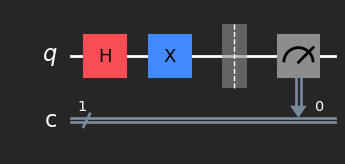

In [6]:
qc.barrier()
qc.measure(0, 0)
draw_circuit(qc)

Now, this circuit alone doesn't tell us the probabilities of measuring the qubit in either state, but we can run the circuit on a simulator or a real quantum computer (we'll get to this later) to get the results. The measurement results will be stored in the classical bit `c`, and you can access them after running the following code:

In [15]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend = backend, optimization_level = 1)
isa_qc = pm.run(qc)

sampler = Sampler(mode = backend)
job = sampler.run([isa_qc], shots = 1024)
result = job.result()

The `AerSimulator` is such a backend that simulates quantum circuits on a classical computer, allowing you to run your circuits without needing access to a real quantum computer. The `execute()` function runs the circuit on the specified backend, and the `result()` method retrieves the results of the execution. Note that this is a ideal noiseless simulation, and the results will be deterministic if the circuit is run multiple times. We use the standard 1024 shots to get a good statistical distribution of the measurement results:

Counts:  {'1': 519, '0': 505}


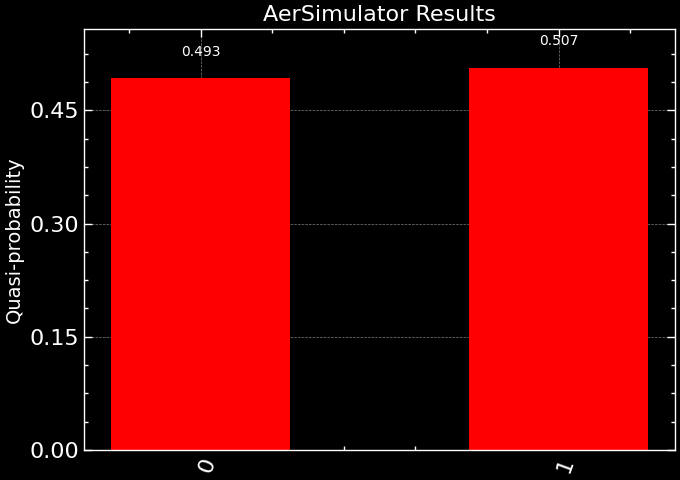

In [16]:
counts = result[0].data.c.get_counts()
print('Counts: ', counts)

plot_distribution(counts, color = 'red', title = 'AerSimulator Results')

1024 coinflips won't yield a 50:50 split, but this is good enough for your first go. To see if the supoosed discrepancy is predominantly just statistical and not (at least not significantly) influenced by sampling bias in measurement, we change our shots to $2^{25}$ to see the difference (note that this will take quite a while more):

In [ ]:
job = sampler.run([isa_qc], shots = 33554432)
result = job.result()

Counts:  {'1': 16779057, '0': 16775375}


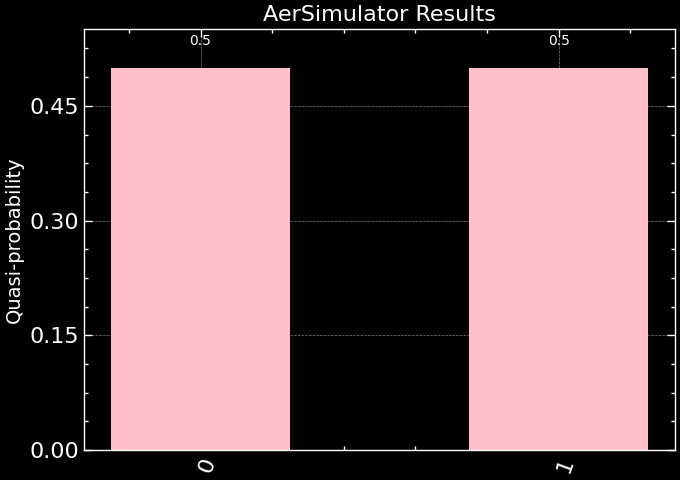

In [21]:
counts = result[0].data.c.get_counts()
print('Counts: ', counts)

plot_distribution(counts, color = 'pink', title = 'AerSimulator Results')

Much better already! :>

# Statistical Nerd-Out Bit

Considering that a coinflip is defined by a binomial distribution of standard deviation $$\sigma=\sqrt{n\cdot p(1-p)}$$ The relative deviations $\sigma/n_i$ for $n_1=2^{10}$ and $n_2=2^{25}$, for $p=0.5$, are 1.56\% and 0.00863\% respectively. These correspond to 180.73 times more accuracy for a $2^{15}$-fold higher sample size. 

Comparing with raw results, we have deltas of 14 and 3682 counts respectively, which comes out to be 263 times better accuracy.

Ultimately, the theoretical prediction should be trusted, as raw deltas will converge toward it with sufficient sampling over repeated trials.. Also, I measured about 287.4 seconds of runtime for $2^{25}$ shots, which is sorta reasonable for such an accurate result.

# Running on Real Quantum Computers

Qiskit provides a way to run your circuits on real quantum computers through [IBM Quantum Cloud](https://quantum.cloud.ibm.com). To do this, you need to set up an account and obtain an API token. Once you have the token, you can use it to access the IBM Quantum backend and run your circuits on real quantum hardware. You can also use the [IBM Quantum Composer](https://quantum.cloud.ibm.com/composer?initial=N4IgjghgzgtiBcIDyAFAogOQIoEEDKAsgAQBMAdAAwDcAOgHYCWdAxgDYCuAJgKZE3jdWDAEYBGMk2b9ademABO3AOZEwAbQAsAXRnNFK5pp316IADQg6EGNwQgAqnQAuDJ626cizBvObtXIAC%2BQA) to create and run circuits visually, which is a great way to get the basics down without writing code. Come back anytime!

We can get started on linking your IBM Cloud account to run quantum circuits on real quantum computers. First, have your API key and its designator handy somewhere, and then run the following code to set up your account. Make sure to replace `<Your API Token>` with your actual API token:

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel = 'ibm_cloud', token = '<Your API Token>')

QiskitRuntimeService.save_account(channel = 'ibm_cloud', token = '<Your API Token>', overwrite = True)

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-09-07 01:43:40,808: Default instance not set. Searching all available instances.


We now setup the backend, in particular any available and sufficiently powerful backend. If ibmq_qasm_simulator is not available, you can find a number of available backends on the 'Compute Resources' tab of the IBM Quantum Cloud, for example, `ibm_brisbane` or `ibm_oslo`, or just use the least_busy method:

In [5]:
backend = service.least_busy(simulator = False, operational = True)
backend.name, backend.num_qubits

('ibm_torino', 133)

## 1. Optimization:

*Optimization* is a crucial step especially when working on large circuits, as it helps reduce the number of gates. Higher optimization levels may take longer to compile, but lead to better results. Optimization also reduces a significant factor in real hardware, *noise*. Don't worry about the gates we use here, we'll get to them in due time. For now, just follow along with the code:

Also, try to guess what circuit this is!

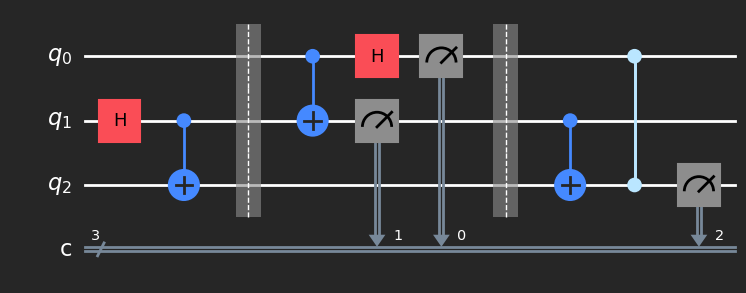

In [6]:
qc = QuantumCircuit(3, 3)
qc.h(1)
qc.cx(1, 2)

qc.barrier()

qc.cx(0, 1)
qc.h(0)
qc.measure(1, 1)
qc.measure(0, 0)

qc.barrier()

qc.cx(1, 2)
qc.cz(0, 2)
qc.measure(2, 2)

draw_circuit(qc)

This is a quantum teleportation circuit, which uses entanglement to nonphysically transmit the quantum state of a qubit!  

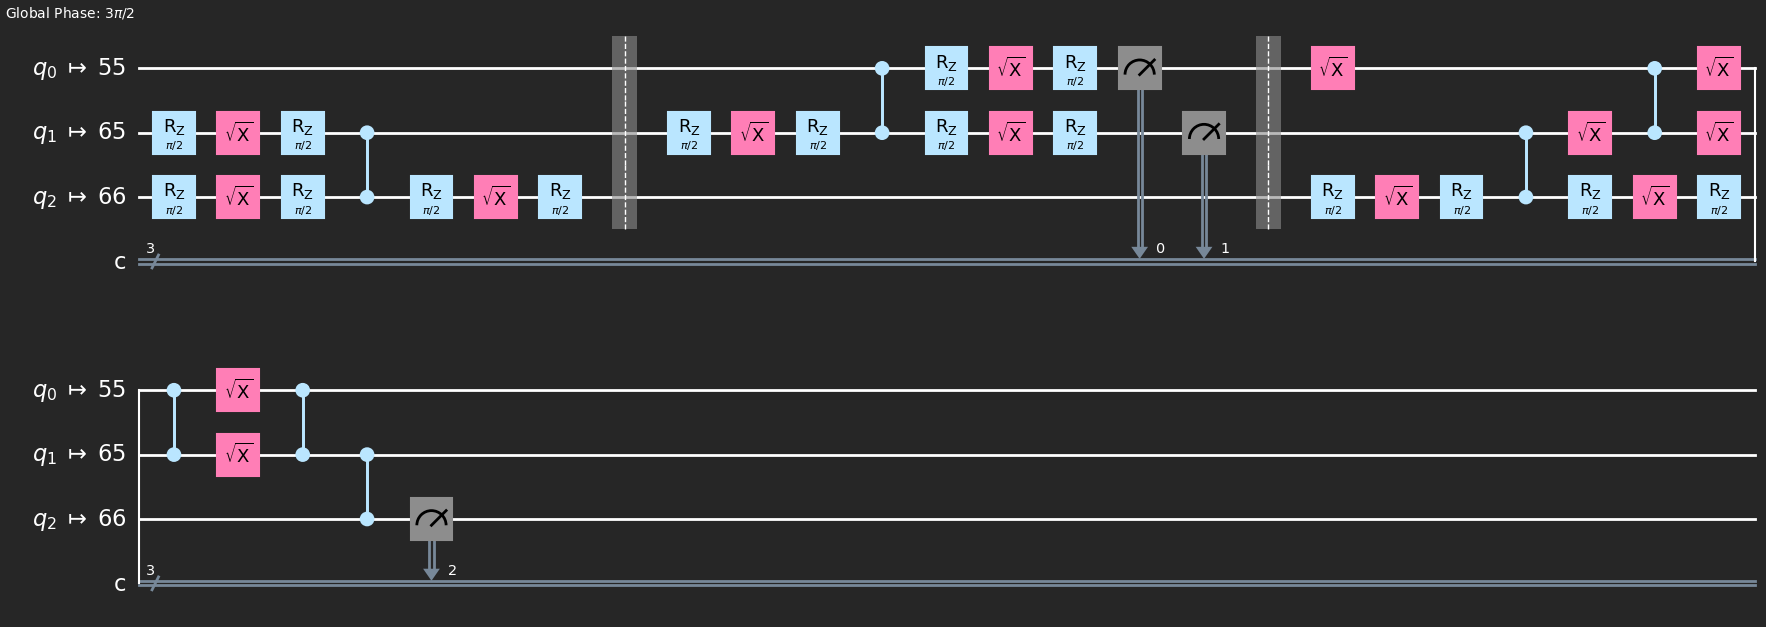

In [7]:
# Pass Manager for Optimization Level 3
# Higher optimization levels may take longer to compile, but lead to better results.

pm = generate_preset_pass_manager(backend = backend, optimization_level = 3)
isa = pm.run(qc)

draw_circuit(isa)

I know this looks like a mess, but bear with me. We created a quantum circuit with 3 qubits and 3 classical bits, and applied a series of gates to entangle them and perform the teleportation protocol. The optimization protocol has seemingly far exceeded the number of gates in the original circuit, but this is because it has combined and simplified several gates into more *efficient* ones, while preserving the overall functionality of the circuit. You'll see, when we actually compare `qc` and `isa`!

Additionally, the 60, 61, and 62 qubits are *physical* qubits on the backend, meaning that they correspond to **actual ones** on the quantum hardware. The other ones are *virtual*, used for simulations. Optimization takes into account the connectivity and error rates of these physical qubits, and maps the virtual qubits to the physical qubits in a way that minimizes errors and maximizes performance. Seemingly, it's mapped our 3 qubits to the 60th, 61st and 62nd physical qubits on the backend, which are likely chosen for their relatively low error rates and good connectivity.

## 2. Sampling and Execution:

Like most statistical experiments, we run the circuit multiple times to get a good distribution of results. The *Sampler* is a feature or *Qiskit Primitive* that optimizes the execution of circuits by reducing the number of shots required to obtain accurate results, which is especially a crucial consideration when running against time and resource constraints:


✅ Job finished in 0.4 s | Final status: DONE
Counts:  {'000': 1981, '010': 1823, '001': 2067, '011': 1966, '111': 134, '101': 81, '100': 54, '110': 86}


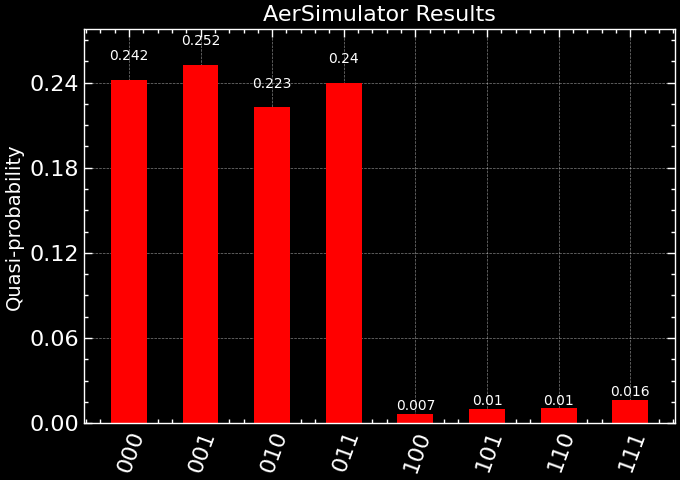

In [ ]:
sampler = Sampler(mode = backend)

job = sampler.run([isa], shots = 8192)
result = job.result()

# Job monitoring

import time
start_time = time.time()

while not job.in_final_state():
    
    status = job.status()
    elapsed = time.time() - start_time
    
    print(f"Status: {status} | Elapsed: {elapsed:.1f} s", end="\r")
    time.sleep(2)   # check every 2s

result = job.result()
elapsed_total = time.time() - start_time

print(f"\n✅ Job finished in {elapsed_total:.1f} s | Final status: {job.status()}")
counts = result[0].data.c.get_counts()
print('Counts: ', counts)

plot_distribution(counts, color = 'red', title = 'Hardware Results')

# PANIC CODEBLOCK: CANCEL ALL QUEUED JOBS (OPEN PLAN USERS)

In [ ]:
jobs = service.jobs(limit = 20)
for job in jobs:
    if not job.in_final_state():   # queued or running
        print(f"Cancelling job {job.job_id()} (status={job.status()})")
        job.cancel()

# Back to Nerdiness!

Shot count is normally a guesstimate, but I'd like to dig deeper (feel free to indulge and test it yourself!). Below I’ll give concrete shot recommendations, and the math behind how precise those shots make your estimated probabilities. 

Coming back to what I explained earlier, the binomial distribution has a theoretical 'worst-case' of $p=0.5$, the std-dev is 

$$\sigma=\sqrt{n\cdot p(1-p)}=\sqrt{n}/2$$

For target error $e$, $n$ must satisfy

$$\frac{\sigma}{n}=\frac{1}{2\sqrt{n}}\leq e\implies n\geq\frac{1}{4e^2}$$

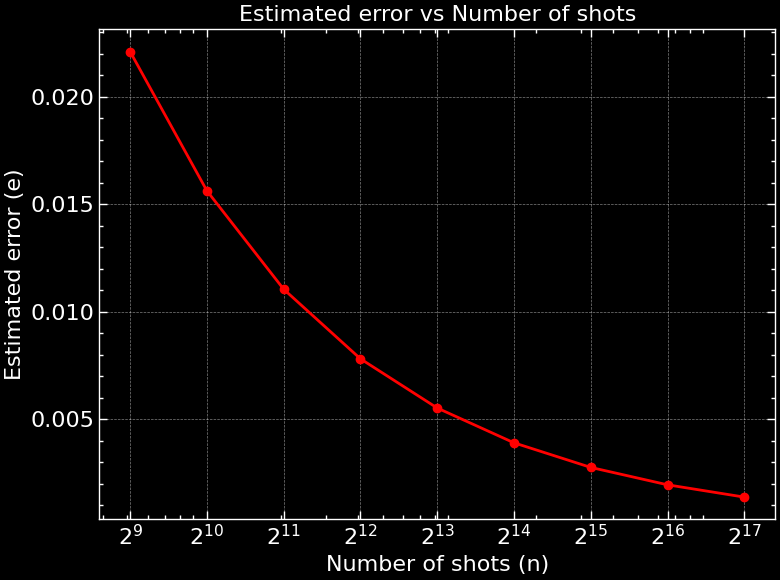

In [ ]:
n = np.array([512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072])
e = 1 / (2 * np.sqrt(n))

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

plt.plot(n, e, marker= 'o', color = 'red')
plt.xscale('log')
plt.xlabel('Number of shots (n)')
plt.ylabel('Estimated error (e)')

plt.title('Estimated error vs Number of shots')

plt.tight_layout()
plt.xticks(n, [f'$2^{{{int(np.log2(n))}}}$' for n in n])

plt.show()

So, we have 

- 1024 shots: $e \approx \pm 1.56$%

- 2048 shots: $e \approx \pm 1.11$%

- 4096 shots: $e \approx \pm 0.78$%

- 8192 shots: $e \approx \pm 0.55$%

- 16384 shots: $e \approx \pm 0.39$%

- 32768 shots: $e \approx \pm 0.28$%

- 65536 shots: $e \approx \pm 0.195$%

If you want good precision with modest cost: $2^{13}$ or $2^{14}$ shots, 

High-precision sub-0.3% fidelity requires $2^{15}$+ shots.

Pushing for under $\pm 0.2$% requires $2^{16}+$ shots, costly and long.

## 3. Interpretation of Results:

Comparing with AerSimulator results:

Counts:  {'010': 2128, '000': 1995, '001': 2060, '011': 2009}


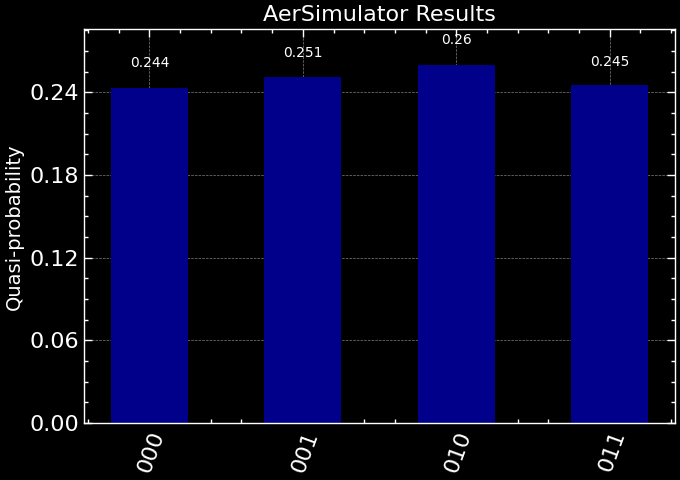

In [11]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend = backend, optimization_level = 3)

sampler = Sampler(mode = backend)
job = sampler.run([isa], shots = 8192)
result = job.result()

counts = result[0].data.c.get_counts()
print('Counts: ', counts)
plot_distribution(counts, color = 'darkblue', title = 'AerSimulator Results')

Note that in Qiskit, these states are bit-ordered as `c[2]c[1]c[0]`, meaning that the first classical bit corresponds to the LSB (rightmost) in the output. As observed, the real quantum computer has the effect of noisy states appearing as $\ket{101}$ and $\ket{110}$, which are not part of the ideal teleportation protocol. Decoherence, optimization, operational errors and environmental exposure are some of the factors that contribute.

# ----------------------------------------- *** ------------------------------------------

This concludes our introductory notebook on quantum computing with Qiskit. You've learned about the basics of quantum computing, qubits, quantum gates, and measurement. You've also seen how to create and run quantum circuits using Qiskit, both on simulators and real quantum hardware. The jazz is just beginning, and there's a lot more to explore in the world of quantum computing. Happy coding!